# Jupyter and IPython display protocol

(Open tha in classic notebook)

In [1]:
import pandas as pd
import seaborn.apionly as sns
iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Modifying objects reprs

In [3]:
class MultiMime:
    
    def __repr__(self):
        return "this is the repr"
    
    def _repr_html_(self):
        return "This <b>is</b> html"
    
    def _repr_markdown_(self):
        return "This **is** markdown"

    def _repr_latex_(self):
        return "$ Latex \otimes mimetype $"

In [4]:
display(MultiMime())

this is the repr

In [5]:
MultiMime()

this is the repr

In [1]:
# restart the kernel

MultiMime() # SHould fail with kernel restarted

NameError: name 'MultiMime' is not defined

## External formatters

As a visual example we'll use Orly Parody books covers, in particular a small resolution of some of them to limit the amount of data we'll be working with. 

In [2]:
cd thumb

/Users/bussonniermatthias/talks/talks/2017-11-27-PyDataParisMeetup/thumb


Let's see some of the images present in this folder:

In [3]:
names = !ls *.png
names[:20], f"{len(names) - 10} more"

(['10x-big.png',
  'adulting-big.png',
  'arbitraryforecasts-big.png',
  'avoiddarkpatterns-big.png',
  'blamingthearchitecture-big.png',
  'blamingtheuser-big.png',
  'breakingthebackbutton-big.png',
  'buzzwordfirst-big.png',
  'buzzwordfirstdesign-big.png',
  'casualsexism-big.png',
  'catchingemall-big.png',
  'changinstuff-big.png',
  'chasingdesignfads-big.png',
  'choosingbasedongithubstars-big.png',
  'codingontheweekend-big.png',
  'coffeeintocode-big.png',
  'copyingandpasting-big.png',
  'crushingit-big.png',
  'deletingcode-big.png',
  'doingwhateverdanabramovsays-big.png'],
 '63 more')

In [4]:
from IPython.display import Image

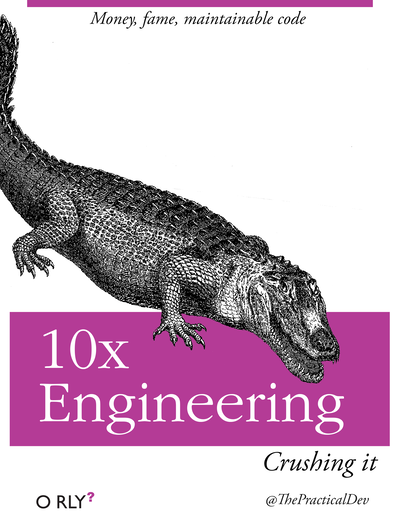

In [5]:
im = Image(names[0])
im

In [6]:
from random import choices
mylist = list(map(Image, set(choices(names, k=10))))
mylist

[<IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>]

In [7]:
import base64
def tag_from_data(data, size='100%'):
    return '''<img
                    style="
                        display:inline;
                        width:{1};
                        max-width:400px;
                        padding:10px;
                        margin-top:14px"
                    onMouseOver="this.style['box-shadow']='5px 5px 30px 0px rgba(163,163,163,1)'" 
                    onMouseOut="this.style['box-shadow']=''"
                    src="data:image/png;base64,{0}" 
             />'''.format(''.join(base64.encodebytes(data).decode().split('\n')), size)

def html_list_formatter(ll):
    html = get_ipython().display_formatter.formatters['text/html']
    reps = []
    for o in ll:
        if isinstance(o, Image):
            reps.append(tag_from_data(o.data, '200px') )
        else: 
            h = html(o)
            if h:    
                reps.append(h)
            else:
                reps.append(repr(o)+'')
    
    return '<span>['+','.join(reps)+']</span>'

Same as before, with square bracket after and before, and a bit of styling that change the drop shadow on hover. Now we register the above with IPython:

In [8]:
mylist

[<IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>]

In [9]:
ipython = get_ipython()
html_formatter = ipython.display_formatter.formatters['text/html']
html_formatter.for_type(list, html_list_formatter)

[<IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>]
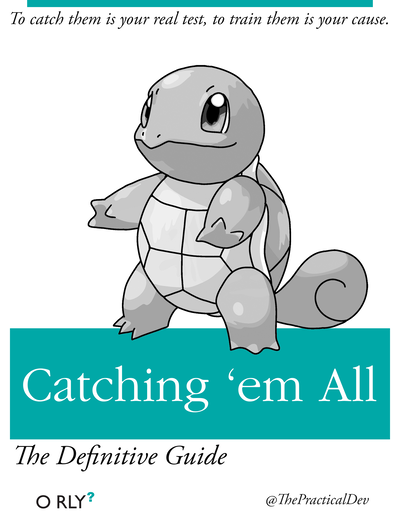
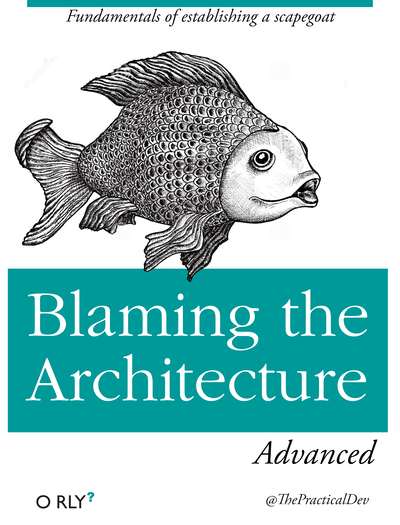
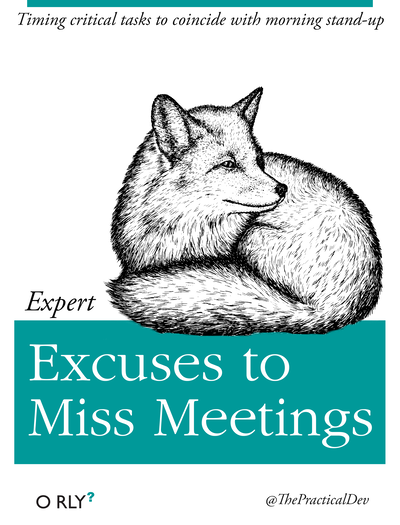
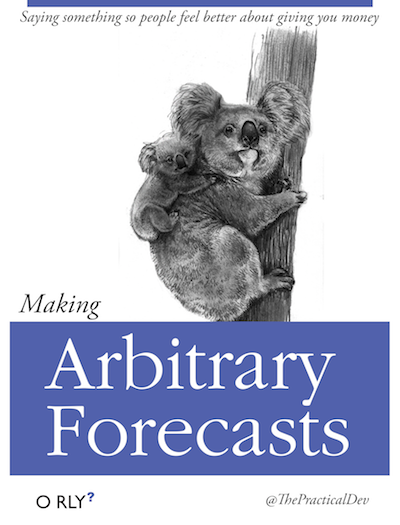
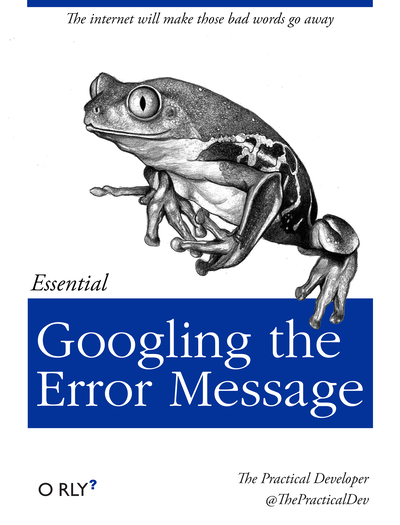
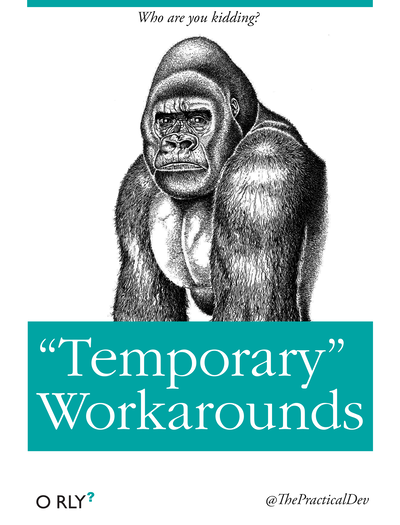
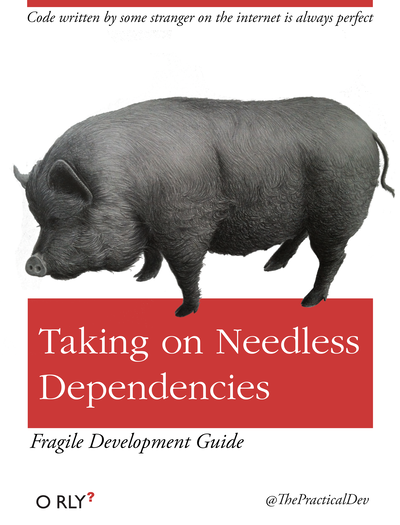
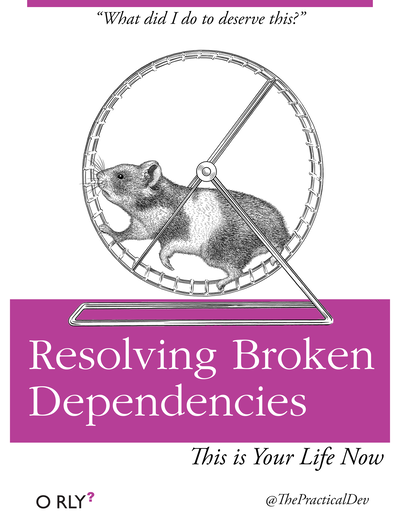
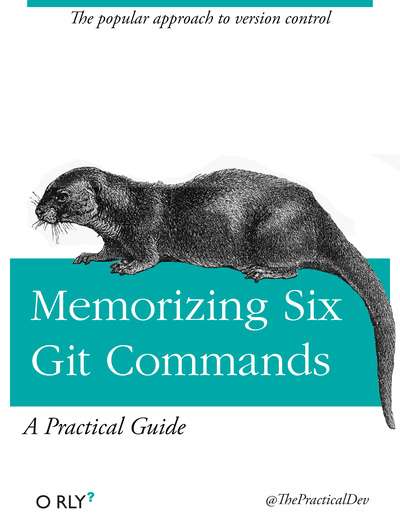

In [10]:
mylist

## Disp

External integration for some already existing object is available in [disp](https://github.com/ipython/disp), in particular you will find representation for SparkContext, `requests`'s `Responses` object (collapsible json content and headers), as well as a couple others. 

In [11]:
from requests.models import Response
import requests

In [12]:
r = requests.get('http://localhost:8888/api/contents') # http://localhost:8888/api/contents is down/no-network
r

<Response [403]>

In [13]:
r.json()

{'message': 'Forbidden', 'reason': None}

### Existing formatters

In [14]:
from disp.py3only import html_formatter_for_Response
html_formatter.for_type(Response, html_formatter_for_Response)

In [15]:
r

<Response [403]>